# Etude du Désabonnement d'un client à une Card credit.

- Importation des librairie

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
sns.set()

- Chargement du Dataset

In [2]:
df = pd.read_csv('bank.csv', sep=';', na_values='Unknown')

In [3]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


- Calcule du nombre de données manquante par Colonne

In [4]:
df.isna().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

- Traitement des valeurs manquante

In [5]:
    #Copy du Dataset
data = df.copy()


In [6]:
#Suppression des données manquante de la colonne la 
data = data.drop(['CLIENTNUM'],axis=1)

In [7]:
#Suppression des données manquante de la colonne Marital_status par les lignes
data = data.dropna()

- Vérification de la suppression des données manquante

In [8]:
data.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [9]:
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311


In [10]:
data['Card_Category'].value_counts()

Blue        6598
Silver       391
Gold          81
Platinum      11
Name: Card_Category, dtype: int64

In [11]:
data['Education_Level'].value_counts()

Graduate         2591
High School      1653
Uneducated       1204
College           844
Post-Graduate     431
Doctorate         358
Name: Education_Level, dtype: int64

In [12]:
data['Income_Category'].value_counts()

Less than $40K    2792
$40K - $60K       1412
$80K - $120K      1202
$60K - $80K       1103
$120K +            572
Name: Income_Category, dtype: int64

In [13]:
data['Attrition_Flag'].value_counts()

Existing Customer    5968
Attrited Customer    1113
Name: Attrition_Flag, dtype: int64

- Encodage des variables qualitatives

In [15]:
df_quali_nom = data.select_dtypes(exclude=['int64','float64']).drop(['Income_Category','Education_Level','Card_Category','Attrition_Flag'],axis=1)
df_quanti = data.select_dtypes(exclude=object)
df_quali_nom

,Gender,Marital_Status
0,M,Married
1,F,Single
2,M,Married
4,M,Married
5,M,Married
...,...,...
10120,M,Single
10121,F,Single
10122,M,Single
10124,F,Married


In [18]:
#Encodage des variables qualitive nominale
df_quali_nom = pd.get_dummies(df_quali_nom)

#Encodage des variable qualitative ordinale
data['Card_Category'] = data['Card_Category'].replace(['Blue','Silver','Gold','Platinum'],[0,1,2,3])

data['Income_Category'] = \
    data['Income_Category'].\
    replace(['Less than $40K','$40K - $60K','$80K - $120K','$60K - $80K','$120K +'],\
    [0,1,2,3,4])

data['Education_Level'] = \
    data['Education_Level'].\
    replace(['Graduate','High School','Uneducated','College','Post-Graduate','Doctorate'],\
    [3,2,0,1,4,5])

# Encodeage de la variable cible   
#enc = LabelEncoder()
#label_encoder = enc.fit(data['Attrition_Flag'])
#data['Attrition_Flag'] = label_encoder.transform(data['Attrition_Flag']
data['Attrition_Flag'] = data['Attrition_Flag'].replace(['Existing Customer','Attrited Customer'],[1,0])

In [19]:
pd.get_dummies(df['Marital_Status'])

,Divorced,Married,Single
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,0
4,0,1,0
...,...,...,...
10122,0,0,1
10123,1,0,0
10124,0,1,0
10125,0,0,0


- Assemblage du Dataset

In [20]:
datas = pd.concat([df_quali_nom,data['Card_Category'],\
                   data['Income_Category'],data['Education_Level'],\
                   df_quanti],axis=1)

In [21]:
datas.head()

,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Card_Category,Income_Category,Education_Level,Customer_Age,Dependent_count,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,1,0,1,0,0,3,2,45,3,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,0,0,0,1,0,0,3,49,5,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,1,0,1,0,0,2,3,51,3,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
4,0,1,0,1,0,0,3,0,40,3,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,0,1,0,1,0,0,1,3,44,2,...,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311


- Creation des variable pour l'entrainement du modèle

In [23]:
X = datas
y = data['Attrition_Flag']

In [24]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=.3, random_state=5)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4956, 22)
(2125, 22)
(4956,)
(2125,)


- Modelisation

In [35]:
model_svm = LinearSVC(random_state=5)
model_svm.fit(X_train,y_train)


c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [36]:
train_score = model_svm.score(X_train, y_train)
print(f'Score sur le données d\entrainement : {train_score}')

Score sur le données d\entrainement : 0.8418079096045198


In [38]:
test_score = model_svm.score(X_test, y_test)
print(f'Score sur les données de test : {test_score}')

Score sur les données de test : 0.8442352941176471


- Score d'entrainement et de Test

In [39]:
print(f'Le score d\'entrainement est : {train_score}')
print(f'Le score de test est : {test_score}')

Le score d'entrainement est : 0.8418079096045198
Le score de test est : 0.8442352941176471


- Valeur Prédict par le modèle

In [40]:
y_pred = model_svm.predict(X_test)

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.46      0.02      0.03       330
           1       0.85      1.00      0.92      1795

    accuracy                           0.84      2125
   macro avg       0.65      0.51      0.48      2125
weighted avg       0.79      0.84      0.78      2125



- Courbe d'apprentissage

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\admin\appdata\local\program

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\admin\appdata\local\program

[ 396  792 1189 1585 1982 2378 2774 3171 3567 3964]


c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


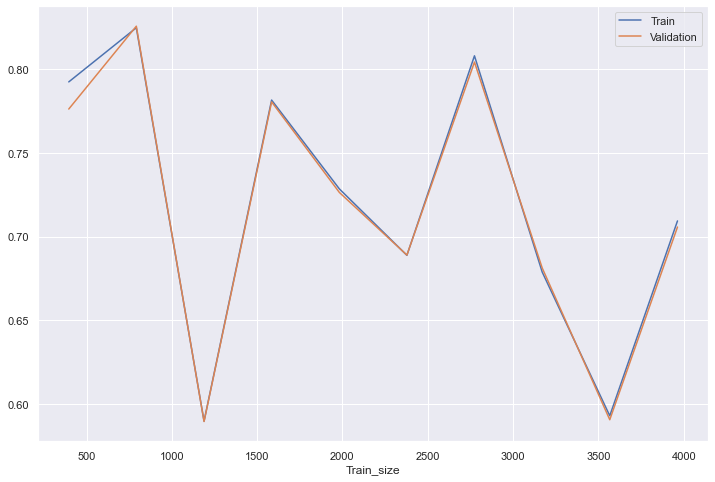

In [49]:
N, train_score, val_score = learning_curve(model_svm, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv = 5)
print(N)
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis = 1), label = 'Train')
plt.plot(N, val_score.mean(axis = 1), label = 'Validation')
plt.xlabel('Train_size')
plt.legend()
plt.show()

- Utilisation du model RandomForest 

In [32]:
rfc = RandomForestClassifier(n_estimators=100,max_depth=5,random_state=5)

In [33]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=5)

In [50]:
train_sc = rfc.score(X_train,y_train)
test_sc = rfc.score(X_test, y_test)

print(f'SCORE D\'ENTRAINEMENT : {train_sc}')
print(f'SCORE DE TEST : {test_sc}')

SCORE D'ENTRAINEMENT : 0.9241323648103309
SCORE DE TEST : 0.9035294117647059


In [41]:
y_predict = rfc.predict(X_test)

In [42]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.85      0.46      0.60       330
           1       0.91      0.98      0.95      1795

    accuracy                           0.90      2125
   macro avg       0.88      0.72      0.77      2125
weighted avg       0.90      0.90      0.89      2125



[ 396  792 1189 1585 1982 2378 2774 3171 3567 3964]


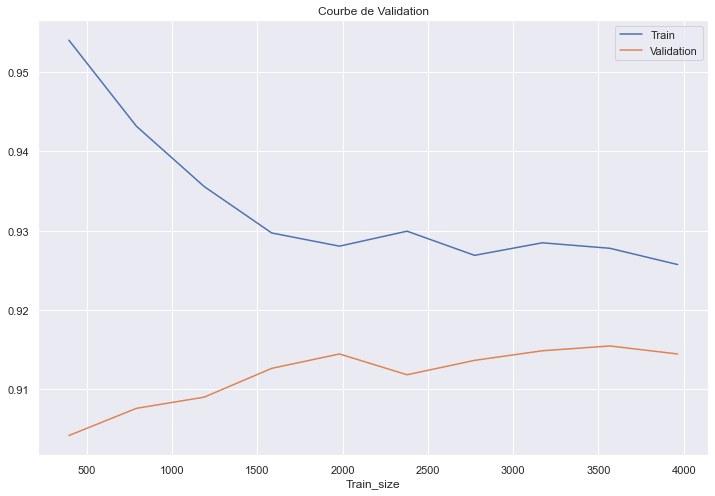

In [50]:
N, train_score, val_score = learning_curve(rfc, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv = 5)
print(N)
plt.figure(figsize=(12,8))
plt.title('Courbe de Validation')
plt.plot(N, train_score.mean(axis = 1), label = 'Train')
plt.plot(N, val_score.mean(axis = 1), label = 'Validation')
plt.xlabel('Train_size')
plt.legend()
plt.show()

- Utilisation du model de KNeighbors

In [53]:
kn_model = KNeighborsClassifier(n_neighbors=5)
kn_model.fit(X_train, y_train)
print('Train Score :', kn_model.score(X_train, y_train))
print('Test Score :', kn_model.score(X_test,y_test))

Train Score : 0.9202986279257466
Test Score : 0.8936470588235295


In [ ]:
#imputation par le mode des variables qualitatives
for i in list(df_train.columns)[1:-1]:
    if df_train[i].dtype == 'object':
        df_train[i].fillna(value=df_train[i].mode()[0],inplace=True)